# Neural Network

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%tensorflow_version 1.x
import tensorflow as tf
tf.__version__

'1.15.0'

In [0]:
def random_regression_data(n):
    # n = number of samples
    np.random.seed(n)
    x = np.linspace(-3.14,6.28,n)
    y = np.sin(x) + np.random.random(n) * 1.5
    return x,y

X,y = random_regression_data(100)

In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((80,), (80,), (20,), (20,))

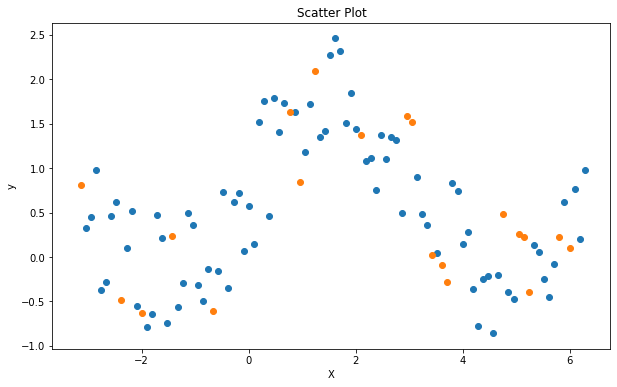

In [5]:
def plotting():
    plt.figure(figsize=(10,6))
    plt.scatter(x_train,y_train)
    plt.scatter(x_test,y_test)
    plt.xlabel('X'),plt.ylabel('y')
    plt.title('Scatter Plot')
plotting()

# Base Line Model (1 estimator)

In [0]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [0]:
from tensorflow.keras.callbacks import TensorBoard

In [11]:
def base_line():
    model=Sequential()
    model.add(Dense(units=1,input_shape=(1,)))# input connected to output
    # y = a + b * x
    model.compile(optimizer='adam',loss='mse')
    return model

# calling baseline model
baseline = base_line()
print(baseline.summary())
# initializing tensorboard
tfb = TensorBoard('baseline')
# Training Model 
history = baseline.fit(x=x_train,y=y_train,batch_size=None,epochs=1000,callbacks=[tfb],validation_data=[x_test,y_test])
# loading into data
data_loss_base_line = pd.DataFrame(history.history)
data_loss_base_line.plot(kind='line') # visualizing losses

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
None
Train on 80 samples, validate on 20 samples
Epoch 1/1000
80/80 [==============================] - 0s 1ms/sample - loss: 17.8150 - val_loss: 24.0196
Epoch 2/1000
80/80 [==============================] - 0s 93us/sample - loss: 17.7299 - val_loss: 23.8973
Epoch 3/1000
80/80 [==============================] - 0s 90us/sample - loss: 17.6394 - val_loss: 23.7760
Epoch 4/1000
80/80 [==============================] - 0s 88us/sample - loss: 17.5542 - val_loss: 23.6551
Epoch 5/1000
80/80 [==============================] - 0s 103us/sample - loss: 17.4712 - val_loss: 23.5363
E

TypeError: ignored

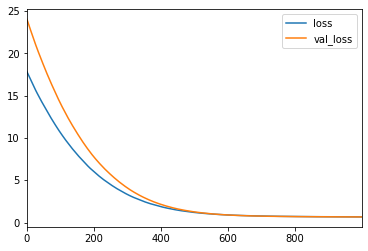

In [14]:
data_loss_base_line = pd.DataFrame(history.history)
data_loss_base_line.plot(kind='line') # visualizing losses

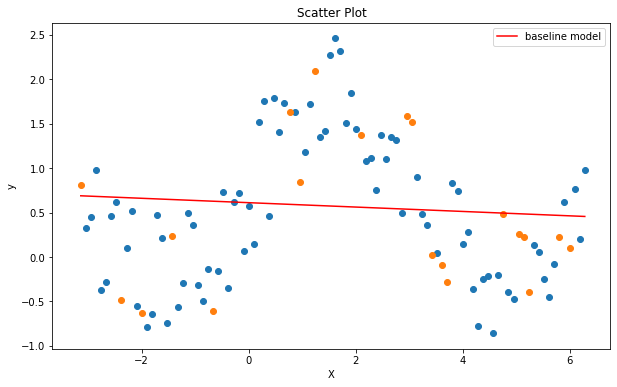

In [18]:
# predicting results
y_pred_base= baseline.predict(X)
plotting()
plt.plot(X,y_pred_base,'r') # plot regression line
plt.legend(['baseline model'])

# Neural Network
>  No. of hidden layer is more than 2 and number of neuron is more than 100 then this kind of network is Deep Neural Network

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
None
Train on 80 samples, validate on 20 samples
Epoch 1/1000
80/80 [==============================] - 0s 2ms/sample - loss: 0.8493 - val_loss: 0.7430
Epoch 2/1000
80/80 [==============================] - 0s 151us/sample - loss: 0.8165 - val_loss: 0.7271
Epoch 3/1000
80/80 [==============================] - 0s 107us/sample - loss: 0.7992 - val_loss: 0.7270
Epoch 4/1000
80/80 [==============================] - 0s 116us/sample - loss: 0.7761 - val_loss: 0.7004
Epoch 5/1000
80/80 [==============================] - 0s 105us/sample - loss: 0.7532 - val_loss: 0.6785
Epoch 6/1000
80/80 [==============================] - 0s 112us/sample - loss: 0.7380 - va

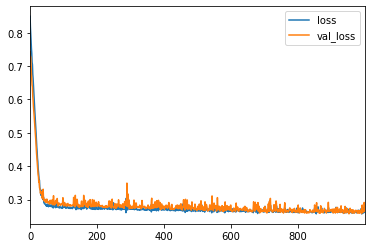

In [20]:
def neural_network():
    model=Sequential()
    model.add(Dense(units=100,input_shape=(1,),activation='relu'))# input connected to output
    model.add(Dense(units=50,activation='relu'))
    model.add(Dense(units=1))
    model.compile(optimizer='adam',loss='mse')
    return model

# calling baseline model
neural_network = neural_network()
print(baseline.summary())
# initializing tensorboard
tfb = TensorBoard('neural_network')
# Training Model 
history = neural_network.fit(x=x_train,y=y_train,batch_size=None,epochs=1000,callbacks=[tfb],validation_data=[x_test,y_test])
# loading into data
data_loss_nn = pd.DataFrame(history.history)
data_loss_nn.plot(kind='line') # visualizing losses

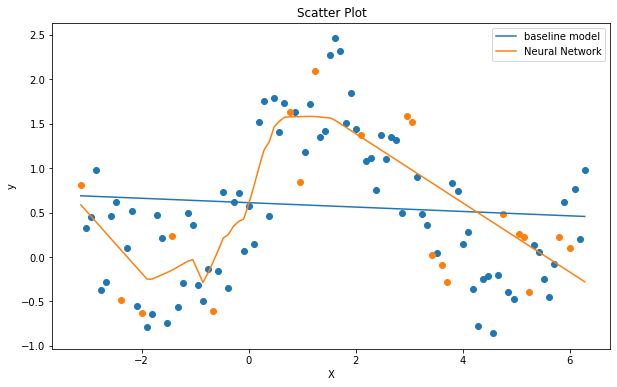

In [21]:
# predicting results
y_pred_nn= neural_network.predict(X)
plotting()
plt.plot(X,y_pred_base) # plot regression line
plt.plot(X,y_pred_nn) # plot regression line
plt.legend(['baseline model','Neural Network'])

# Deep Neural Network

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 1000)              2000      
_________________________________________________________________
dense_9 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dense_10 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dense_11 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dense_12 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dense_13 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dense_14 (Dense)             (None, 1000)             

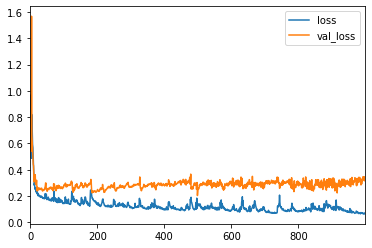

In [10]:
def deep_neural_network():
    model=Sequential()
    model.add(Dense(units=1000,input_shape=(1,),activation='relu'))# input connected to output
    model.add(Dense(units=1000,activation='relu'))
    model.add(Dense(units=1000,activation='relu'))
    model.add(Dense(units=1000,activation='relu'))
    model.add(Dense(units=1000,activation='relu'))
    model.add(Dense(units=1000,activation='relu'))
    model.add(Dense(units=1000,activation='relu'))
    model.add(Dense(units=1))
    model.compile(optimizer='adam',loss='mse')
    return model

# calling baseline model
deep_nn = deep_neural_network()
print(deep_nn.summary())
# initializing tensorboard
tfb = TensorBoard('deep_neural_network')
# Training Model 
history = deep_nn.fit(x=x_train,y=y_train,batch_size=None,epochs=1000,callbacks=[tfb],validation_data=[x_test,y_test])
# loading into data
data_loss_nn = pd.DataFrame(history.history)
data_loss_nn.plot(kind='line') # visualizing losses

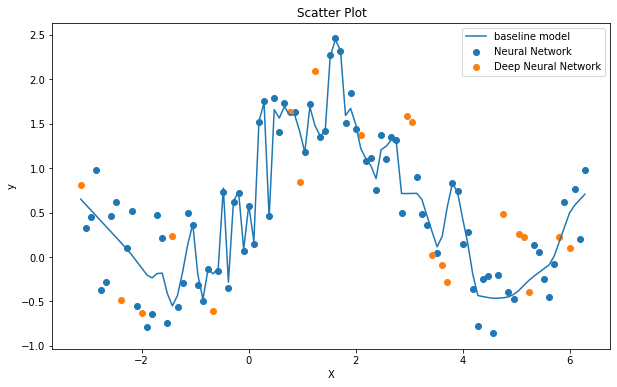

In [12]:
# predicting results
y_pred_dnn= deep_nn.predict(X)
plotting()
# plt.plot(X,y_pred_base) # plot regression line
# plt.plot(X,y_pred_nn) # plot regression line
plt.plot(X,y_pred_dnn) 
plt.legend(['baseline model','Neural Network','Deep Neural Network'])

# Regularization

In [0]:
from tensorflow.keras import regularizers

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 1000)              2000      
_________________________________________________________________
dense_17 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dense_18 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dense_19 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dense_20 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dense_21 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dense_22 (Dense)             (None, 1000)             

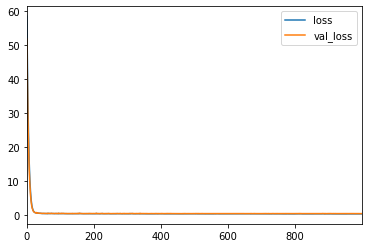

In [14]:
def deep_neural_network_reg():
    model=Sequential()
    model.add(Dense(units=1000,input_shape=(1,),activation='relu',kernel_regularizer=regularizers.l2(l=0.01)))# input connected to output
    model.add(Dense(units=1000,activation='relu',kernel_regularizer=regularizers.l2(l=0.01)))
    model.add(Dense(units=1000,activation='relu',kernel_regularizer=regularizers.l2(l=0.01)))
    model.add(Dense(units=1000,activation='relu',kernel_regularizer=regularizers.l2(l=0.01)))
    model.add(Dense(units=1000,activation='relu',kernel_regularizer=regularizers.l2(l=0.01)))
    model.add(Dense(units=1000,activation='relu',kernel_regularizer=regularizers.l2(l=0.01)))
    model.add(Dense(units=1000,activation='relu',kernel_regularizer=regularizers.l2(l=0.01)))
    model.add(Dense(units=1))
    model.compile(optimizer='adam',loss='mse')
    return model

# calling baseline model
deep_nn_reg = deep_neural_network_reg()
print(deep_nn_reg.summary())
# initializing tensorboard
tfb = TensorBoard('deep_neural_network_reg')
# Training Model 
history = deep_nn_reg.fit(x=x_train,y=y_train,batch_size=None,epochs=1000,callbacks=[tfb],validation_data=[x_test,y_test])
# loading into data
data_loss_dnn_r = pd.DataFrame(history.history)
data_loss_dnn_r.plot(kind='line') # visualizing losses

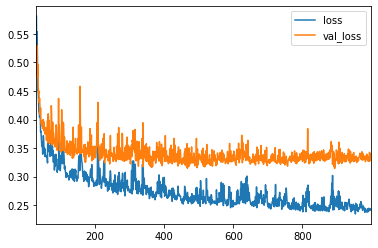

In [18]:
data_loss_dnn_r[30:].plot(kind='line') # visualizing losses

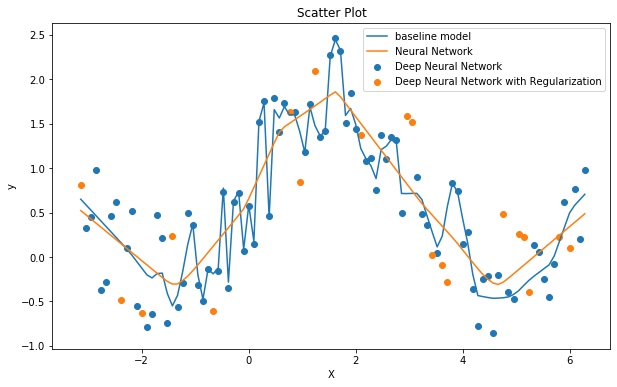

In [16]:
# predicting results
y_pred_dnn_re= deep_nn_reg.predict(X)
plotting()
# plt.plot(X,y_pred_base) # plot regression line
# plt.plot(X,y_pred_nn) # plot regression line
plt.plot(X,y_pred_dnn) 
plt.plot(X,y_pred_dnn_re)
plt.legend(['baseline model','Neural Network','Deep Neural Network','Deep Neural Network with Regularization'])



---



---

